<p>I got this dataset from <a href = 'https://www.kaggle.com/uciml/pima-indians-diabetes-database'>Pima Indians Diabetes Dataset</a> and decided to do some exploratory data analysis on it. There are f amazing insights in it so feel free to have a look at it. Happy Learning!</p>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
df = pd.read_csv('diabetes.csv')
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

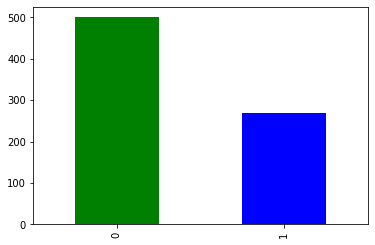

In [29]:
df['Outcome'].value_counts().plot(kind = 'bar', color = ['green', 'blue'])

In [30]:
df['Age'].max()

81

In [31]:
df['Age'].min()

21

In [32]:
#Let's group the data into appropriate age groups for further analysis using conditions and values
conditions = [
    (df['Age']>= 18) & (df['Age']<=24),
    (df['Age']> 24) & (df['Age']<=34),
    (df['Age']> 34) & (df['Age']<=60),
    (df['Age']> 60),
]
values = ['youth', 'young_adult', 'middle_aged', 'senior_adult']
df['age_group'] = np.select(conditions, values)

In [33]:
df['age_group'].value_counts()

young_adult     269
middle_aged     253
youth           219
senior_adult     27
Name: age_group, dtype: int64

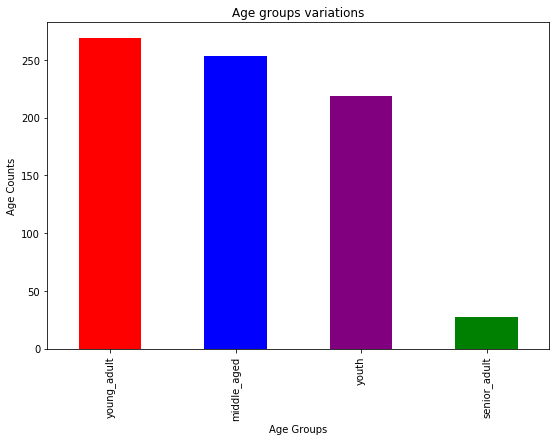

In [34]:
plt.figure(figsize=(9,6))
plt.xlabel('Age Groups')
plt.ylabel('Age Counts')
plt.title('Age groups variations')
df['age_group'].value_counts().plot(kind = 'bar', color=['red', 'blue', 'purple', 'green'])

In [35]:
positive = df[df['Outcome'] == 1]
pos_num = len(positive)
negative = df[df['Outcome'] == 0]
neg_num = len(negative)
print ('The total number of people are %d' %(pos_num + neg_num))
print('The positive cases are %d while negative cases are %d' %(pos_num, neg_num))

The total number of people are 768
The positive cases are 268 while negative cases are 500


In [36]:
# Positive values in each age group
positive['age_group'].value_counts()

middle_aged     135
young_adult      95
youth            31
senior_adult      7
Name: age_group, dtype: int64

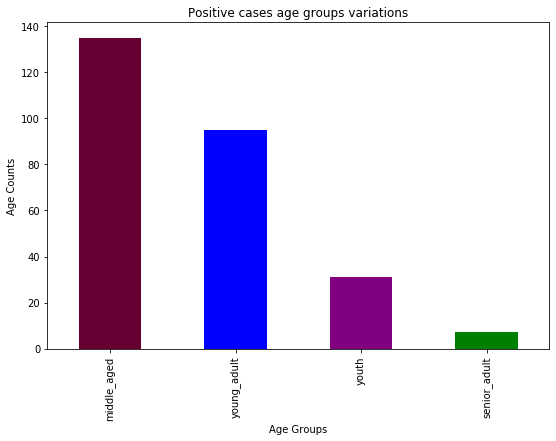

In [37]:
plt.figure(figsize=(9,6))
plt.xlabel('Age Groups')
plt.ylabel('Age Counts')
plt.title('Positive cases age groups variations')
positive['age_group'].value_counts().plot(kind = 'bar', color=['#660033', 'blue', 'purple', 'green'])

In [38]:
#Negative number in each age group
negative['age_group'].value_counts()

youth           188
young_adult     174
middle_aged     118
senior_adult     20
Name: age_group, dtype: int64

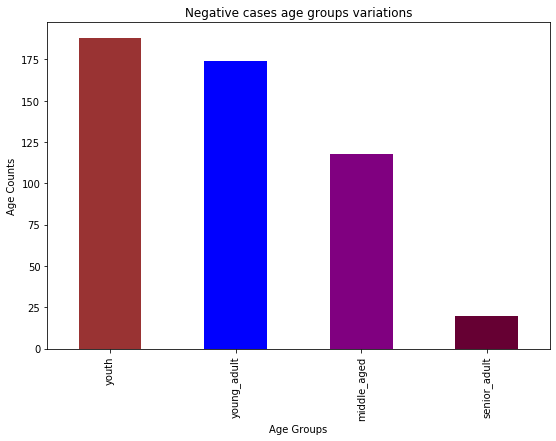

In [39]:
plt.figure(figsize=(9,6))
plt.xlabel('Age Groups')
plt.ylabel('Age Counts')
plt.title('Negative cases age groups variations')
negative['age_group'].value_counts().plot(kind = 'bar', color=['#993333', 'blue', 'purple', '#660033'])

<p>from the above we can see that more youths are negative that positive</p>
<p>the same goes for young adults and senior citizens.</p>
<p>middle aged individuals however seem to be the most affected group</p>

<p>After we have subdidived the groups according to age and found the most affected age group, let us now find if there is any correlation between their outcome, age group and any other factor</p>
<p>This will be done in two groups, first using the variables inclusive of all age groups and using the variables with separate defined age groups. </p>
<p>We will use pairplots, correlation matrices, and heatmaps for that</p>

C:\Users\Bevaline\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Bevaline\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


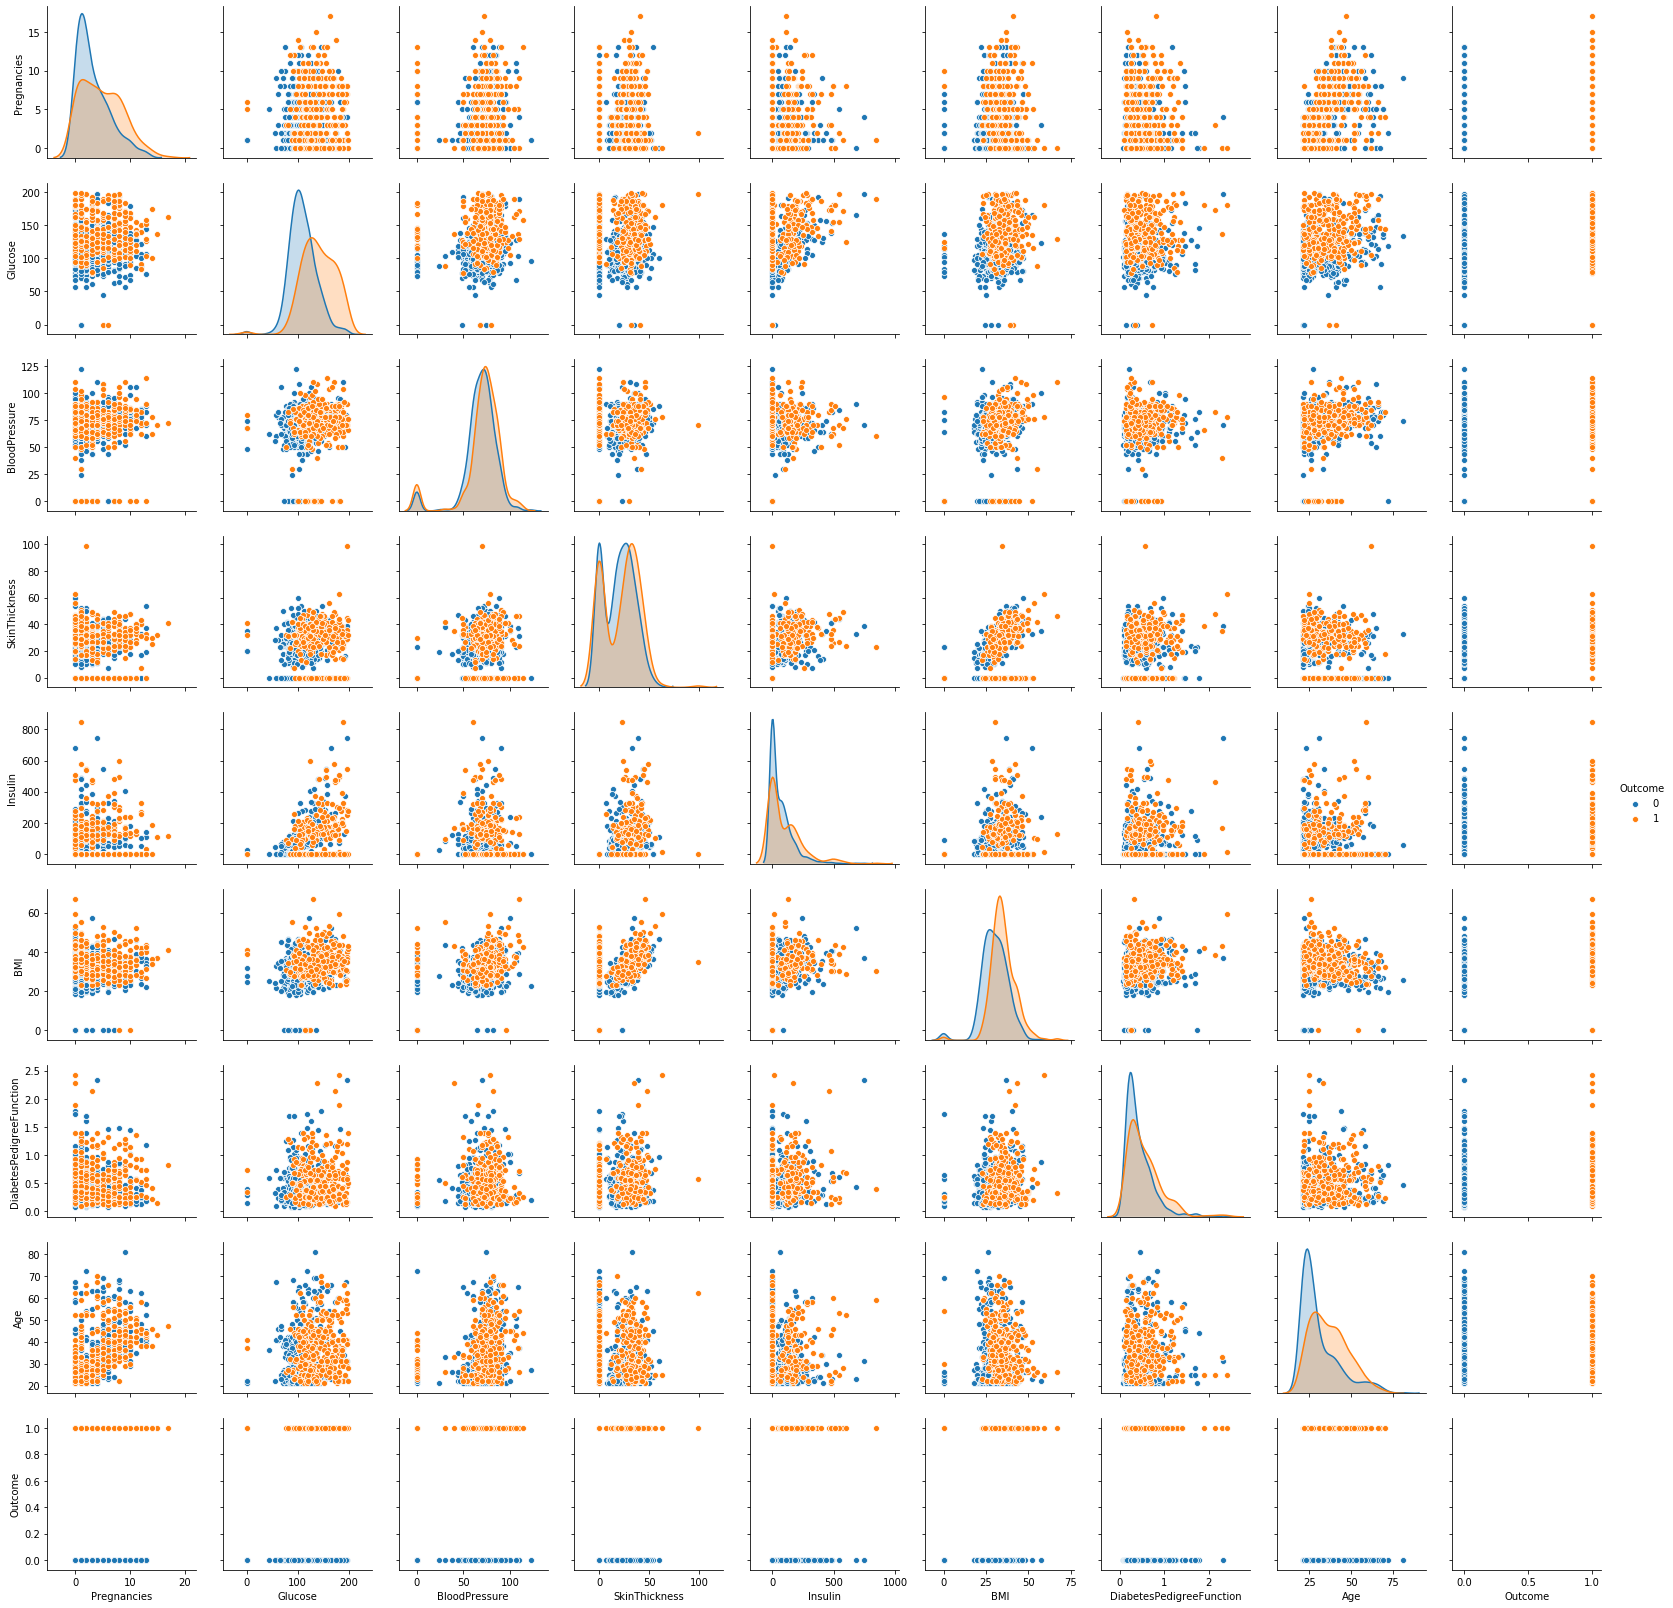

In [40]:
sns.pairplot(df, hue='Outcome')

<p>As shown from the above pairplot, there is a noteable relationship between insulin and glucose, blood pressure and pregnancies, and Insulin and Pregnancies.

In [41]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the correlation matrix above, we can see that there is;
        A noticeable, positive correlation between glucose and insulin, a consederable corelation between glucose and the outcome of the test, skin thickness and insulin, skin thickness and BMI, and an almost strong positive correlation between age and the number of pregnancies one has had, which definitely makes sense.

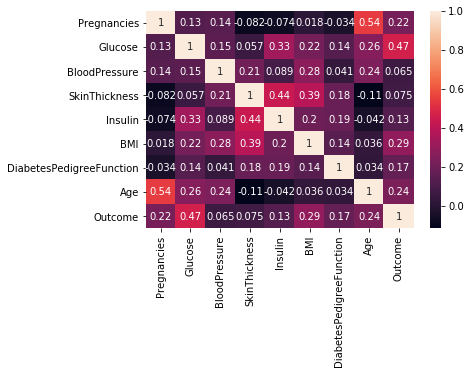

In [42]:
sns.heatmap(corr_matrix, annot = True)

Let us now get down to individual age groups

In [43]:
youth_corr = df[df['age_group'] == 'youth'].corr()
young_adult_corr = df[df['age_group'] == 'young_adult'].corr()
middle_age_corr = df[df['age_group'] == 'middle_aged'].corr()
senior_adults_corr = df[df['age_group'] == 'senior_adult'].corr()

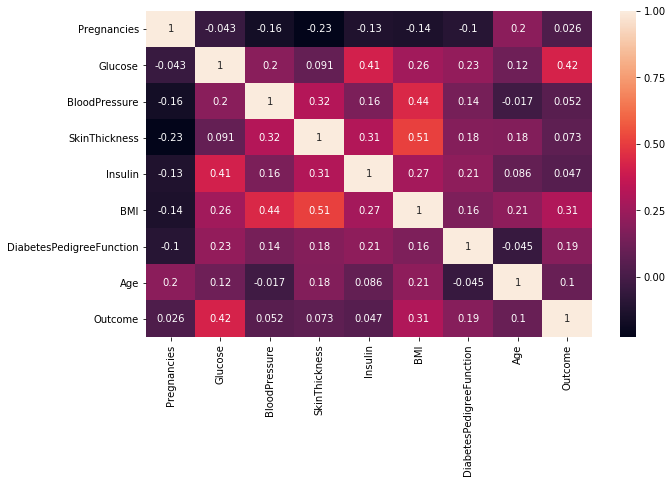

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(youth_corr, annot = True)

As seen from the heatmap above, the youth have a much weaker positive corr between pregnancy and age(makes sense because they're young), the strongest positive corr between blood pressure and BMI, and an average positive corr between BMI and skin thickness.

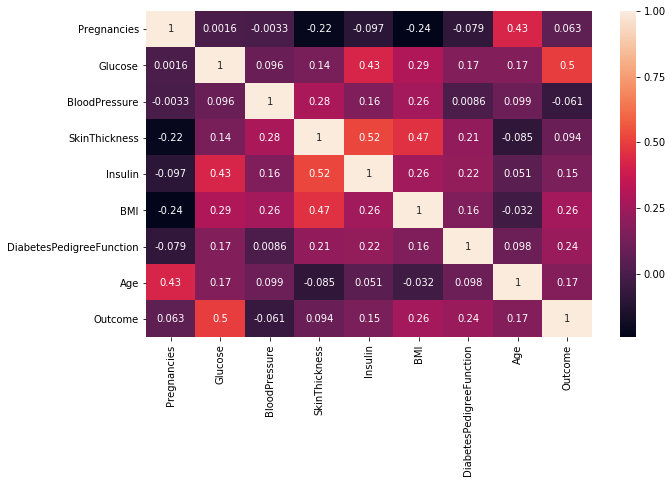

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(young_adult_corr, annot = True)

Young adults on the other hand have the stongest positive correlation coefficient between age and the number of pregrancies, insulin and glucose , insulin and skin thickness correlation matrix. That is, when one variable increases, the other also strongly increases. The opposite is also true. Young adults also have an almost non-existent negative correlation coefficient between blood pressure and the number of pregnancies. This makes sense healthwise, the higher someone's blood pressure would be, the lower the number of pregnanices they are likely to have had. 

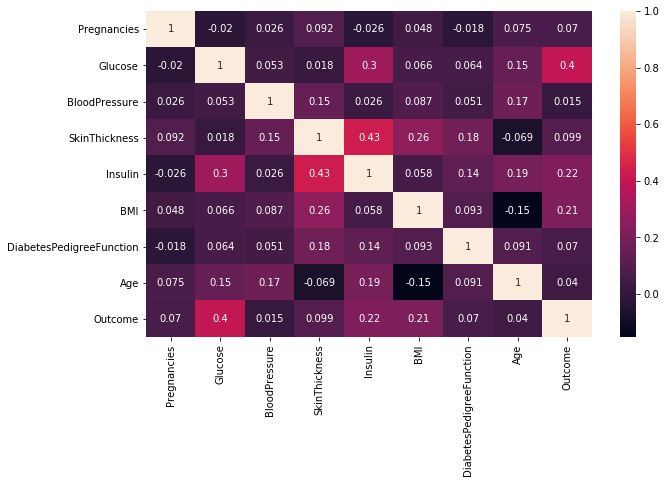

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(middle_age_corr, annot = True)

Middle aged individuals, as can be seen from the heatmap have less strong positive correlation coefficient, more weaker positive correlation coefficients and more weaker negative correlation coefficients.

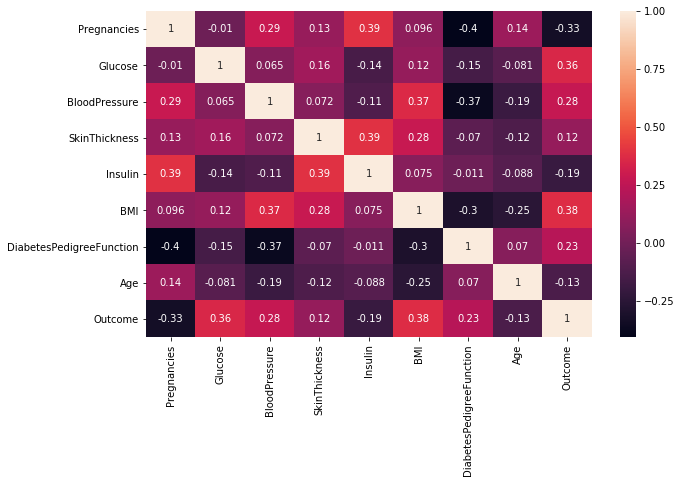

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(senior_adults_corr, annot = True)

Senior adults have the highest negative correlation between their insulin  and glucose levels. That is, of all the reported age groups, when their glucose level increases, their insulin levels drop more than would anyone elses, showing the same for insulin level and glucose levels. 
They also have the highest BMI dependance on the outcome of the test 

<p> For all the groups, the independent variable that seems to have the stongest relationship with, or the biggest effect on the outcome of the results is their glucose level.</p>
<p> The least positive dependant factor for both the youth and middle aged individuals is the number of pregnancies they have had while that for middle aged individuals being blood pressure and that of senior adults being their skin thickness.</p>

In [48]:
df.groupby('age_group').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
age_group,,,,,,,,,
middle_aged,6.600791,129.252964,75.055336,19.565217,74.826087,33.290909,0.468308,44.280632,0.533597
senior_adult,4.851852,136.740741,75.037037,12.259259,15.925926,28.403704,0.446333,65.740741,0.259259
young_adult,3.066914,119.613383,66.483271,21.390335,86.947955,32.744610,0.515844,28.498141,0.353160
youth,1.493151,110.858447,64.721461,21.630137,84.639269,30.011416,0.425142,22.305936,0.141553


<p>Subplots to show the distribution of individual variables all through the data</p>

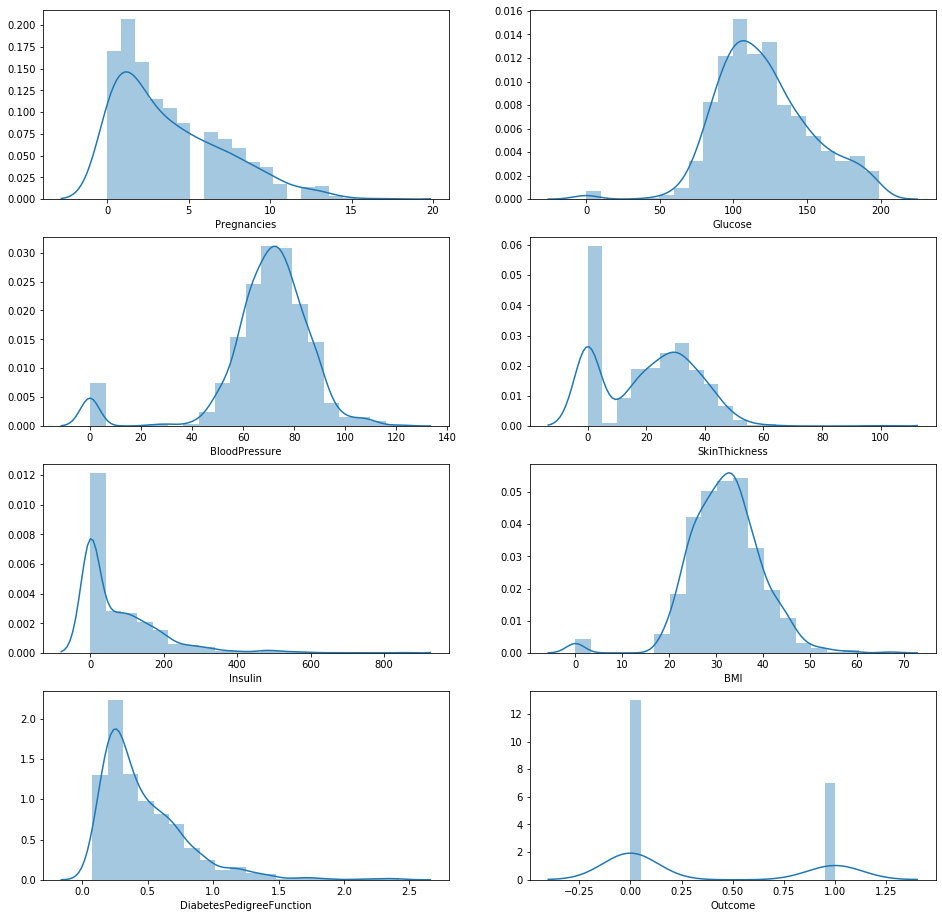

In [49]:
fig = plt.figure(figsize=(16,16))
ax = fig.subplots(4,2)
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,0])
sns.distplot(df.Glucose, bins = 20, ax=ax[0,1])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,0])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[1,1])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,0])
sns.distplot(df.BMI, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.Outcome, bins = 20, ax=ax[3,1])